DATA ANALYST

In [1]:
#pip install pycoingecko
#pip install plotly

In [2]:
import pandas as pd
import datetime as dt
import time as t
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
from pycoingecko import CoinGeckoAPI
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [4]:
cg.ping()  

{'gecko_says': '(V3) To the Moon!'}

In [5]:
#get the coin list in a df
coin_list = cg.get_coins_list()
df_coin = pd.DataFrame.from_dict(coin_list).sort_values('id').reset_index(drop=True)
print(df_coin)

                             id symbol                       name
0                        01coin    zoc                     01coin
1                        0chain    zcn                        Zus
2                 0vix-protocol    vix              0VIX Protocol
3                            0x    zrx                0x Protocol
4      0x0-ai-ai-smart-contract    0x0  0x0.ai: AI Smart Contract
...                         ...    ...                        ...
10050                  zynecoin    zyn                   Zynecoin
10051                   zynergy    zyn                    Zynergy
10052                     zyrri    zyr                      Zyrri
10053                       zyx    zyx                        ZYX
10054                       zzz    zzz                GoSleep ZZZ

[10055 rows x 3 columns]


In [6]:
#df_coin[df_coin['id'] == 'bitcoin']
#df_coin[df_coin['id'] == 'chainlink']
#df_coin[df_coin['id'] == 'ethereum']
#df_coin[df_coin['id'] == 'ripple']
#df_coin[df_coin['id'] == 'solana']
#df_coin[df_coin['id'] == 'litecoin']
#df_coin[df_coin['id'] == 'dogecoin']
#df_coin[df_coin['id'] == 'uniswap']
#df_coin[df_coin['id'] == 'polkadot']
#df_coin[df_coin['id'] == 'cardano']

In [7]:
coins = ['Bitcoin','Ethereum','XRP','Solana','Litecoin','Dogecoin','Uniswap','Polkadot','Cardano','Chainlink']

In [8]:
id_coins = ['bitcoin','chainlink','ethereum','ripple','solana','litecoin','dogecoin','uniswap','polkadot','cardano']

In [9]:
#get the currencies
currencies = cg.get_supported_vs_currencies()
use_currencies = 'usd'

In [10]:
#Get the simple price of the coins we choose 
price = cg.get_price(ids= coins, vs_currencies= use_currencies)
print(price)

{'bitcoin': {'usd': 29162}, 'cardano': {'usd': 0.280846}, 'chainlink': {'usd': 7.02}, 'dogecoin': {'usd': 0.071263}, 'ethereum': {'usd': 1824.23}, 'litecoin': {'usd': 79.27}, 'polkadot': {'usd': 4.77}, 'solana': {'usd': 24.05}, 'uniswap': {'usd': 5.98}}


In [11]:
#Get the price of the coins
from xml.etree.ElementInclude import include


complex_price = price = cg.get_price(ids= coins, vs_currencies= use_currencies,include_market_cap = True,include_24hr_vol = True,
                                     include_24hr_change = True,include_last_updated_at = True)

print(complex_price)

{'bitcoin': {'usd': 29162, 'usd_market_cap': 567237430348.0643, 'usd_24h_vol': 11510303658.138721, 'usd_24h_change': -0.5844678141163411, 'last_updated_at': 1692128363}, 'cardano': {'usd': 0.280846, 'usd_market_cap': 9816231501.682571, 'usd_24h_vol': 159471669.16351417, 'usd_24h_change': -2.982465551820826, 'last_updated_at': 1692128364}, 'chainlink': {'usd': 7.02, 'usd_market_cap': 3769356002.361934, 'usd_24h_vol': 269554413.3959462, 'usd_24h_change': -5.231511263013602, 'last_updated_at': 1692128364}, 'dogecoin': {'usd': 0.071259, 'usd_market_cap': 9993925547.471802, 'usd_24h_vol': 561321245.9831398, 'usd_24h_change': -3.9492561541927396, 'last_updated_at': 1692128371}, 'ethereum': {'usd': 1824.23, 'usd_market_cap': 218862452966.80255, 'usd_24h_vol': 5118579931.833722, 'usd_24h_change': -0.9047632731746633, 'last_updated_at': 1692128364}, 'litecoin': {'usd': 79.27, 'usd_market_cap': 5816916984.224531, 'usd_24h_vol': 503347110.5626357, 'usd_24h_change': -3.313979026351256, 'last_updat

In [12]:
#Get the historical data of the coins
dataMarket_coins = cg.get_coins_markets(vs_currency= use_currencies,ids = id_coins,price_change_percentage = '24h,30d,1y',sparkline = True)
print(dataMarket_coins)

[{'id': 'bitcoin', 'symbol': 'btc', 'name': 'Bitcoin', 'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579', 'current_price': 29162, 'market_cap': 567237430348, 'market_cap_rank': 1, 'fully_diluted_valuation': 612177654313, 'total_volume': 11510303658, 'high_24h': 29430, 'low_24h': 29119, 'price_change_24h': -171.4438955259393, 'price_change_percentage_24h': -0.58447, 'market_cap_change_24h': -3410007701.9801025, 'market_cap_change_percentage_24h': -0.59757, 'circulating_supply': 19458381.0, 'total_supply': 21000000.0, 'max_supply': 21000000.0, 'ath': 69045, 'ath_change_percentage': -57.77583, 'ath_date': '2021-11-10T14:24:11.849Z', 'atl': 67.81, 'atl_change_percentage': 42893.67639, 'atl_date': '2013-07-06T00:00:00.000Z', 'roi': None, 'last_updated': '2023-08-15T19:39:23.658Z', 'sparkline_in_7d': {'price': [29758.98544762777, 29809.599388433326, 29842.807149423195, 29976.211985762355, 29848.20587764123, 29744.85827849708, 29779.56167125089, 29781.2066210

In [13]:
dfmarket_coins = pd.DataFrame.from_dict(dataMarket_coins).sort_values('id').reset_index(drop=True)
dfmarket_coins

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,sparkline_in_7d,price_change_percentage_1y_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_30d_in_currency
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29162.000000,567237430348,1,612177654313,11510303658,29430.000000,...,2021-11-10T14:24:11.849Z,67.810000,42893.67639,2013-07-06T00:00:00.000Z,None,2023-08-15T19:39:23.658Z,"{'price': [29758.98544762777, 29809.5993884333...",20.812438,-0.584468,-3.835740
1,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.280846,9816231502,9,12604655586,159471669,0.290966,...,2021-09-02T06:00:10.474Z,0.019253,1356.41084,2020-03-13T02:22:55.044Z,None,2023-08-15T19:39:24.452Z,"{'price': [0.3003436552655144, 0.3001036051597...",-49.902605,-2.982466,-12.232295
2,chainlink,link,Chainlink,https://assets.coingecko.com/coins/images/877/...,7.020000,3769356002,22,7004936264,269554413,7.450000,...,2021-05-10T00:13:57.214Z,0.148183,4626.56502,2017-11-29T00:00:00.000Z,None,2023-08-15T19:39:24.234Z,"{'price': [7.355214404916585, 7.36240278104769...",-19.311993,-5.231511,4.299327
3,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.071259,9993925547,8,9993892141,561321246,0.075371,...,2021-05-08T05:08:23.458Z,0.000087,82158.29593,2015-05-06T00:00:00.000Z,None,2023-08-15T19:39:31.792Z,"{'price': [0.07513387970667242, 0.074841516539...",-8.552730,-3.949256,1.085764
4,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1824.230000,218862452967,2,218862452967,5118579932,1846.040000,...,2021-11-10T14:24:19.604Z,0.432979,420709.90615,2015-10-20T00:00:00.000Z,"{'times': 82.68856951829467, 'currency': 'btc'...",2023-08-15T19:39:24.148Z,"{'price': [1852.3663614816678, 1856.7585935946...",-3.968397,-0.904763,-5.698595
5,litecoin,ltc,Litecoin,https://assets.coingecko.com/coins/images/2/la...,79.270000,5816916984,14,6643819787,503347111,82.260000,...,2021-05-10T03:13:07.904Z,1.150000,6795.60964,2015-01-14T00:00:00.000Z,None,2023-08-15T19:39:28.927Z,"{'price': [84.53129040731315, 84.2384702120489...",30.483262,-3.313979,-16.189049
6,polkadot,dot,Polkadot,https://assets.coingecko.com/coins/images/1217...,4.770000,6015629213,12,6400527643,97002870,4.990000,...,2021-11-04T14:10:09.301Z,2.700000,77.29153,2020-08-20T05:48:11.359Z,None,2023-08-15T19:39:31.399Z,"{'price': [5.062239461052058, 5.05565276845296...",-45.963128,-4.137979,-10.842732
7,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.601952,31683890242,5,60021822622,1107495525,0.635508,...,2018-01-07T00:00:00.000Z,0.002686,22260.87752,2014-05-22T00:00:00.000Z,None,2023-08-15T19:39:31.397Z,"{'price': [0.6390905290309773, 0.6369164941736...",61.492644,-4.179049,-22.180893
8,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,24.050000,9747793361,10,13320285119,406703342,25.240000,...,2021-11-06T21:54:35.825Z,0.500801,4721.25389,2020-05-11T19:35:23.449Z,None,2023-08-15T19:39:30.336Z,"{'price': [24.220123476181023, 24.525133533643...",-45.307895,-3.049645,-13.387253
9,uniswap,uni,Uniswap,https://assets.coingecko.com/coins/images/1250...,5.980000,4509137510,18,5982139709,92322821,6.300000,...,2021-05-03T05:25:04.822Z,1.030000,486.56621,2020-09-17T01:20:38.214Z,None,2023-08-15T19:39:26.895Z,"{'price': [6.091504125495508, 6.11107631705746...",-29.579819,-4.318190,3.222258


In [14]:
import datetime
import time

date_time = datetime.datetime(2022, 1, 1)
timestamp = time.mktime(date_time.timetuple())

print(timestamp)


1641013200.0


In [15]:
import datetime
import time

date_time = datetime.datetime(2023, 8, 14)
timestamp = time.mktime(date_time.timetuple())

print(timestamp)

1691989200.0


In [16]:
#get daily historical data
daily_bitcoin = cg.get_coin_market_chart_by_id(id = 'bitcoin', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_bitcoin = cg.get_coin_market_chart_range_by_id(id = 'bitcoin', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1641013200, 
                                                  to_timestamp = 1691989200)
#list of lists to dataframe 
df_hist_bitcoin = pd.DataFrame(data = daily_bitcoin['prices'],
                                        columns = ['Date', 'Price bitcoin'])
#reformat date
df_hist_bitcoin['Date'] = df_hist_bitcoin['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_bitcoin = df_hist_bitcoin.set_index('Date')

print(df_hist_bitcoin)


            Price bitcoin
Date                     
27-04-2013     135.300000
28-04-2013     141.960000
29-04-2013     135.300000
30-04-2013     117.000000
01-05-2013     103.430000
...                   ...
11-08-2023   29396.847971
12-08-2023   29412.142275
13-08-2023   29284.969714
14-08-2023   29400.586804
15-08-2023   29332.745609

[3761 rows x 1 columns]


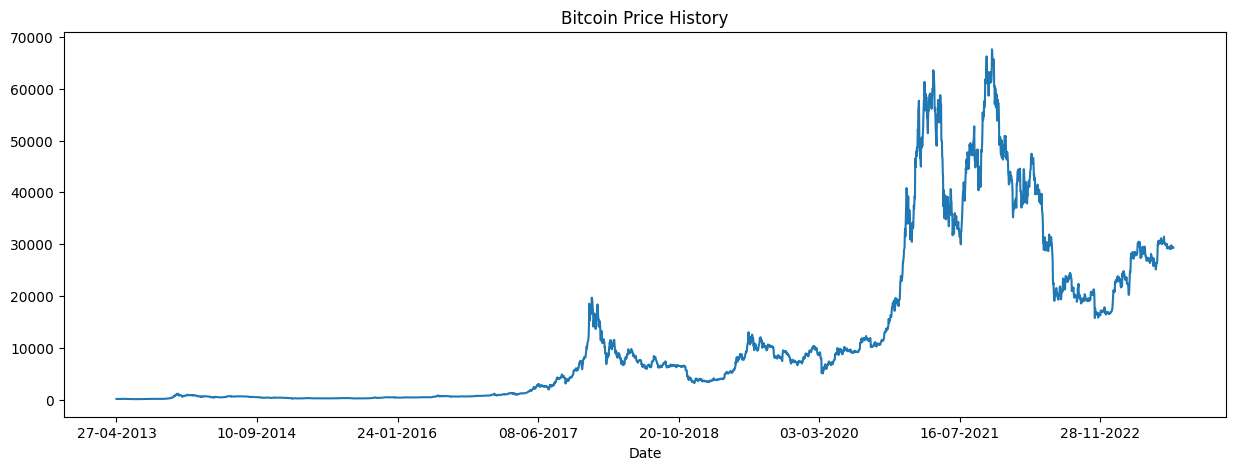

In [17]:
#Plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_bitcoin['Price bitcoin'].plot(ax=ax)
ax.set_title('Bitcoin Price History')
plt.show()

In [18]:
#get daily historical data
daily_chainlink = cg.get_coin_market_chart_by_id(id = 'chainlink', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_chainlink = cg.get_coin_market_chart_range_by_id(id = 'chainlink', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1641013200, 
                                                  to_timestamp = 1691989200)
#list of lists to dataframe 
df_hist_chainlink = pd.DataFrame(data = daily_chainlink['prices'],
                                        columns = ['Date', 'Price chainlink'])
#reformat date
df_hist_chainlink['Date'] = df_hist_chainlink['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_chainlink = df_hist_chainlink.set_index('Date')

print(df_hist_chainlink)


            Price chainlink
Date                       
08-11-2017         0.225377
09-11-2017         0.189036
10-11-2017         0.181223
11-11-2017         0.170013
12-11-2017         0.180691
...                     ...
11-08-2023         7.484950
12-08-2023         7.437998
13-08-2023         7.368214
14-08-2023         7.411531
15-08-2023         7.284006

[2107 rows x 1 columns]


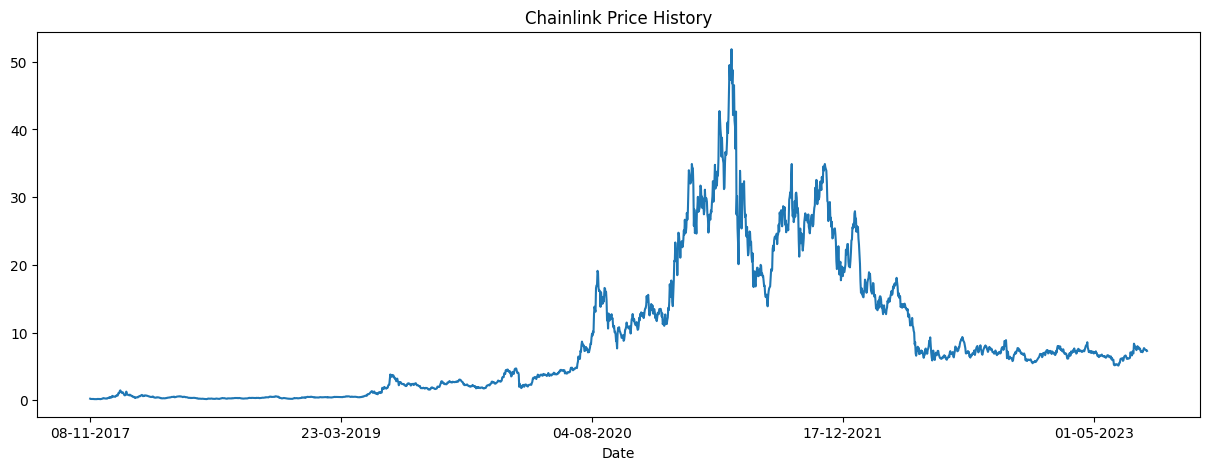

In [19]:
#Plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_chainlink['Price chainlink'].plot(ax=ax)
ax.set_title('Chainlink Price History')
plt.show()


In [20]:
#get daily historical data
daily_ethereum = cg.get_coin_market_chart_by_id(id = 'ethereum', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_ethereum = cg.get_coin_market_chart_range_by_id(id = 'ethereum', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1641013200, 
                                                  to_timestamp = 1691989200)
#list of lists to dataframe 
df_hist_ethereum = pd.DataFrame(data = daily_ethereum['prices'],
                                        columns = ['Date', 'Price ethereum'])
#reformat date
df_hist_ethereum['Date'] = df_hist_ethereum['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_ethereum = df_hist_ethereum.set_index('Date')

print(df_hist_ethereum)

            Price ethereum
Date                      
06-08-2015        2.831620
07-08-2015        1.330750
09-08-2015        0.687586
10-08-2015        1.067379
11-08-2015        1.256613
...                    ...
11-08-2023     1847.541835
12-08-2023     1848.505239
13-08-2023     1839.512810
14-08-2023     1843.513391
15-08-2023     1838.401778

[2931 rows x 1 columns]


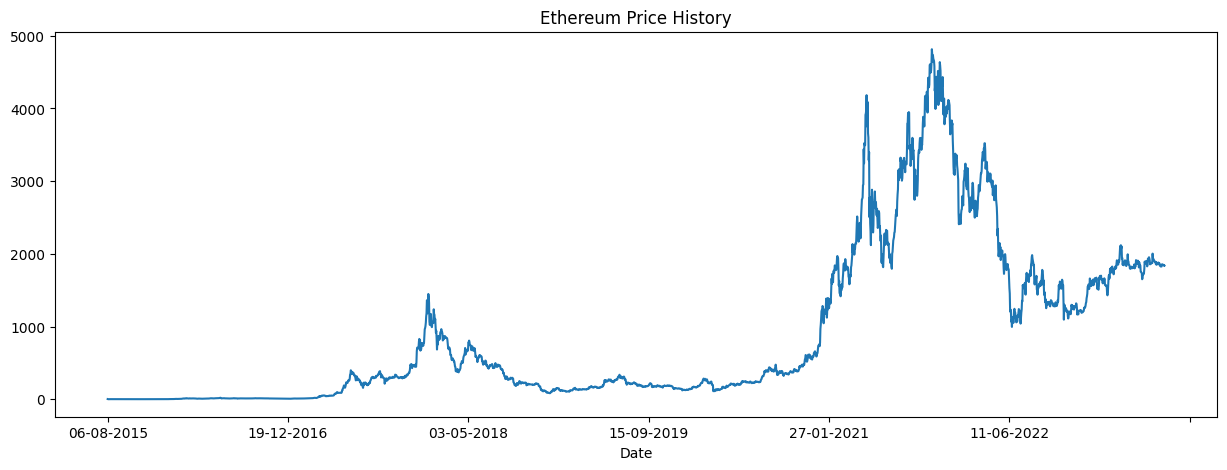

In [21]:
#Plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_ethereum['Price ethereum'].plot(ax=ax)
ax.set_title('Ethereum Price History')
plt.show()

In [22]:
#get daily historical data
daily_ripple = cg.get_coin_market_chart_by_id(id = 'ripple', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_ripple = cg.get_coin_market_chart_range_by_id(id = 'ripple', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1641013200, 
                                                  to_timestamp = 1691989200)
#list of lists to dataframe 
df_hist_ripple = pd.DataFrame(data = daily_ripple['prices'],
                                        columns = ['Date', 'Price ripple'])
#reformat date
df_hist_ripple['Date'] = df_hist_ripple['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_ripple = df_hist_ripple.set_index('Date')

print(df_hist_ripple)

            Price ripple
Date                    
03-08-2013      0.005874
04-08-2013      0.005653
05-08-2013      0.004669
06-08-2013      0.004486
07-08-2013      0.004196
...                  ...
11-08-2023      0.631618
12-08-2023      0.627081
13-08-2023      0.625689
14-08-2023      0.634681
15-08-2023      0.626763

[3660 rows x 1 columns]


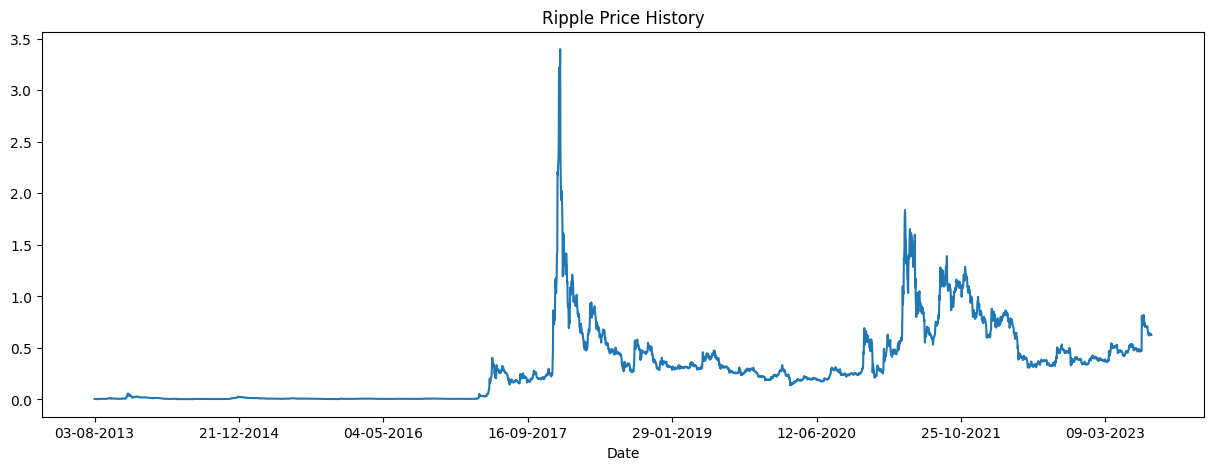

In [23]:
#Plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_ripple['Price ripple'].plot(ax=ax)
ax.set_title('Ripple Price History')
plt.show()

In [24]:
#get daily historical data
daily_solana = cg.get_coin_market_chart_by_id(id = 'solana', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_solana = cg.get_coin_market_chart_range_by_id(id = 'solana', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1641013200, 
                                                  to_timestamp = 1691989200)
#list of lists to dataframe 
df_hist_solana = pd.DataFrame(data = daily_solana['prices'],
                                        columns = ['Date', 'Price solana'])
#reformat date
df_hist_solana['Date'] = df_hist_solana['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_solana = df_hist_solana.set_index('Date')

print(df_hist_solana)

            Price solana
Date                    
10-04-2020      0.957606
11-04-2020      0.784711
12-04-2020      0.875994
13-04-2020      0.786712
14-04-2020      0.666673
...                  ...
11-08-2023     24.579810
12-08-2023     24.891819
13-08-2023     24.223294
14-08-2023     25.147725
15-08-2023     24.761713

[1223 rows x 1 columns]


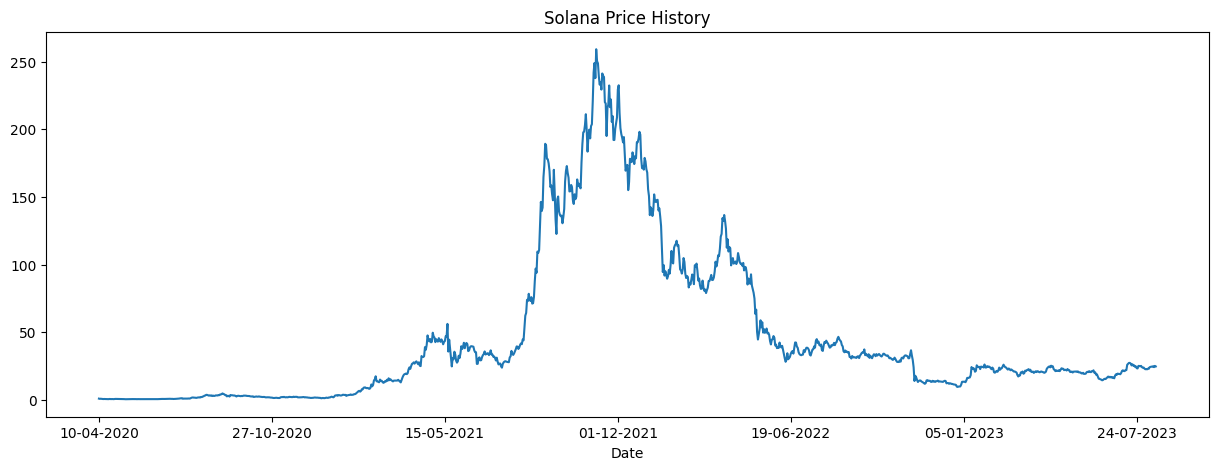

In [25]:
#Plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_solana['Price solana'].plot(ax=ax)
ax.set_title('Solana Price History')
plt.show()

In [26]:
#get daily historical data
daily_litecoin = cg.get_coin_market_chart_by_id(id = 'litecoin', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_litecoin = cg.get_coin_market_chart_range_by_id(id = 'litecoin', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1641013200, 
                                                  to_timestamp = 1691989200)
#list of lists to dataframe 
df_hist_litecoin = pd.DataFrame(data = daily_litecoin['prices'],
                                        columns = ['Date', 'Price litecoin'])
#reformat date
df_hist_litecoin['Date'] = df_hist_litecoin['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_litecoin = df_hist_litecoin.set_index('Date')

print(df_hist_litecoin)

            Price litecoin
Date                      
27-04-2013        4.299830
28-04-2013        4.359400
29-04-2013        4.182950
30-04-2013        3.649140
01-05-2013        3.388790
...                    ...
11-08-2023       83.508009
12-08-2023       83.399575
13-08-2023       81.946229
14-08-2023       82.043497
15-08-2023       81.752768

[3761 rows x 1 columns]


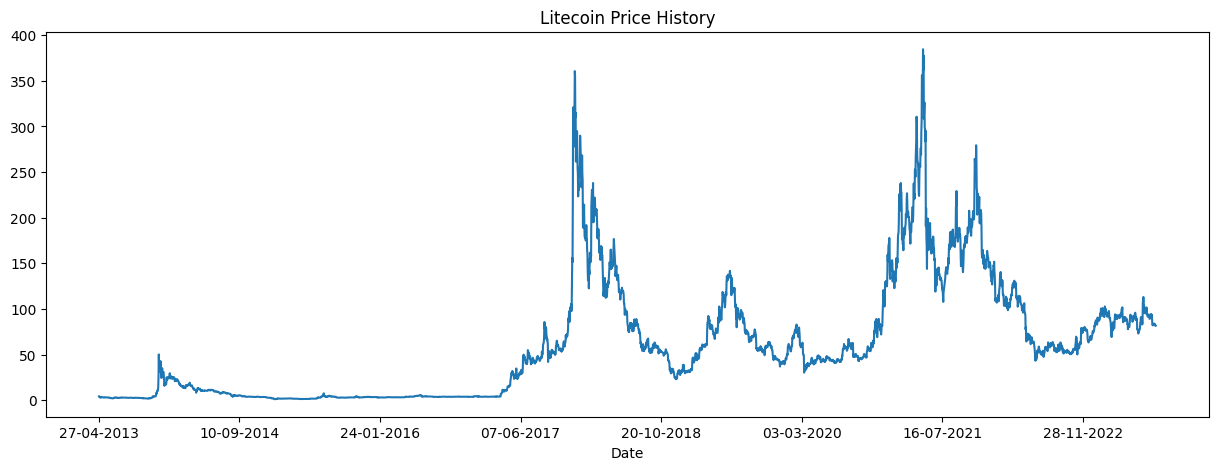

In [27]:
#Plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_litecoin['Price litecoin'].plot(ax=ax)
ax.set_title('Litecoin Price History')
plt.show()

In [28]:
#get daily historical data
daily_dogecoin = cg.get_coin_market_chart_by_id(id = 'dogecoin', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_dogecoin = cg.get_coin_market_chart_range_by_id(id = 'dogecoin', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1641013200, 
                                                  to_timestamp = 1691989200)
#list of lists to dataframe 
df_hist_dogecoin = pd.DataFrame(data = daily_dogecoin['prices'],
                                        columns = ['Date', 'Price dogecoin'])
#reformat date
df_hist_dogecoin['Date'] = df_hist_dogecoin['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_dogecoin = df_hist_dogecoin.set_index('Date')

print(df_hist_dogecoin)

            Price dogecoin
Date                      
14-12-2013        0.000559
16-12-2013        0.000218
17-12-2013        0.000268
18-12-2013        0.000475
19-12-2013        0.000989
...                    ...
11-08-2023        0.075714
12-08-2023        0.076696
13-08-2023        0.074778
14-08-2023        0.074764
15-08-2023        0.073989

[3529 rows x 1 columns]


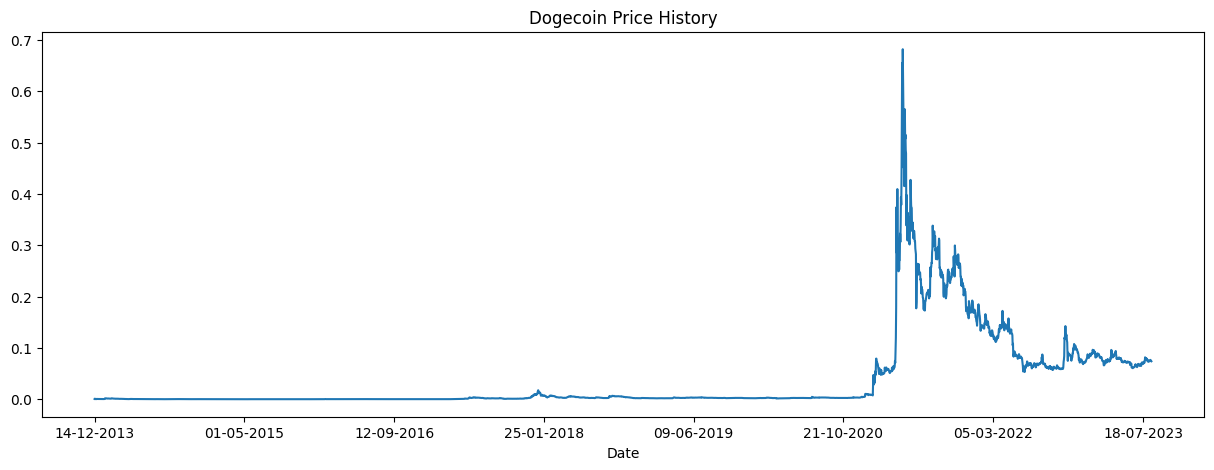

In [29]:
#plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_dogecoin['Price dogecoin'].plot(ax=ax)
ax.set_title('Dogecoin Price History')
plt.show()

In [30]:
#get daily historical data
daily_uniswap = cg.get_coin_market_chart_by_id(id = 'uniswap', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_uniswap = cg.get_coin_market_chart_range_by_id(id = 'uniswap', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1641013200, 
                                                  to_timestamp = 1691989200)
#list of lists to dataframe 
df_hist_uniswap = pd.DataFrame(data = daily_uniswap['prices'],
                                        columns = ['Date', 'Price uniswap'])
#reformat date
df_hist_uniswap['Date'] = df_hist_uniswap['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_uniswap = df_hist_uniswap.set_index('Date')

print(df_hist_uniswap)

            Price uniswap
Date                     
16-09-2020       3.443832
17-09-2020       3.443832
18-09-2020       7.097694
19-09-2020       5.702061
20-09-2020       5.256579
...                   ...
11-08-2023       6.180008
12-08-2023       6.217057
13-08-2023       6.088591
14-08-2023       6.257407
15-08-2023       6.244004

[1064 rows x 1 columns]


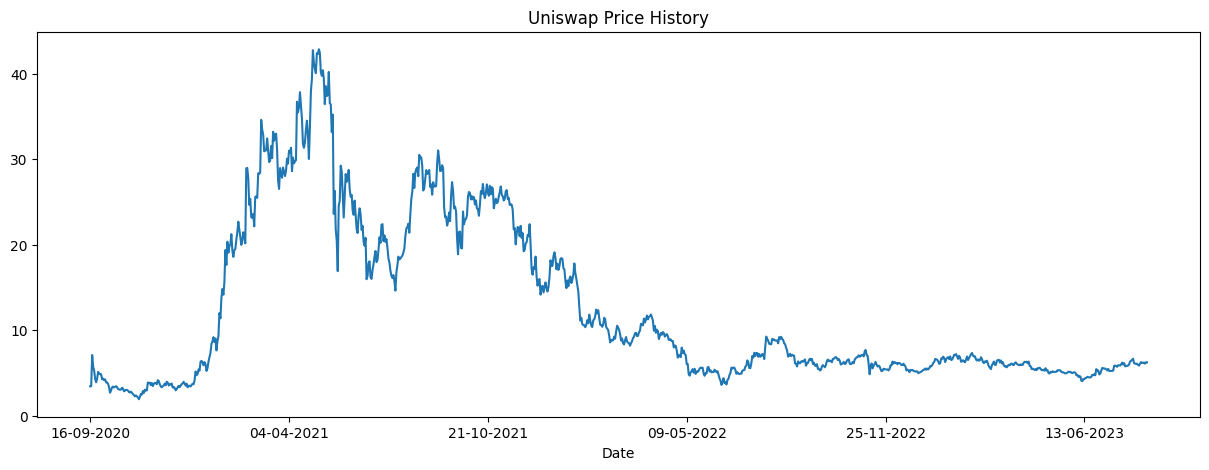

In [31]:
#plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_uniswap['Price uniswap'].plot(ax=ax)
ax.set_title('Uniswap Price History')
plt.show()

In [32]:
#get daily historical data
daily_polkadot = cg.get_coin_market_chart_by_id(id = 'polkadot', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_polkadot = cg.get_coin_market_chart_range_by_id(id = 'polkadot', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1641013200, 
                                                  to_timestamp = 1691989200)
#list of lists to dataframe 
df_hist_polkadot = pd.DataFrame(data = daily_polkadot['prices'],
                                        columns = ['Date', 'Price polkadot'])
#reformat date
df_hist_polkadot['Date'] = df_hist_polkadot['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_polkadot = df_hist_polkadot.set_index('Date')

print(df_hist_polkadot)

            Price polkadot
Date                      
18-08-2020        2.936665
19-08-2020        2.936665
20-08-2020        2.898791
21-08-2020        2.871923
22-08-2020        4.481389
...                    ...
11-08-2023        5.002864
12-08-2023        5.032357
13-08-2023        4.984807
14-08-2023        4.986299
15-08-2023        4.964441

[1093 rows x 1 columns]


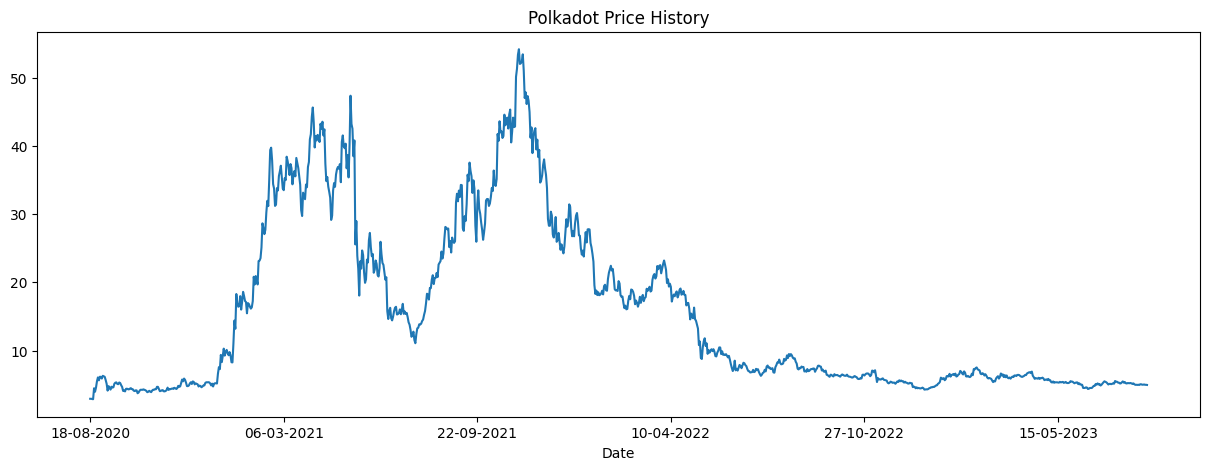

In [33]:
#plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_polkadot['Price polkadot'].plot(ax=ax)
ax.set_title('Polkadot Price History')
plt.show()

In [34]:
#get daily historical data
daily_cardano = cg.get_coin_market_chart_by_id(id = 'cardano', 
                               vs_currency = 'usd',
                               days = 'max')

#input a range of timestamps to get data for - using predetermined frequency
chartRange_cardano = cg.get_coin_market_chart_range_by_id(id = 'cardano', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1641013200, 
                                                  to_timestamp = 1691989200)
#list of lists to dataframe 
df_hist_cardano = pd.DataFrame(data = daily_cardano['prices'],
                                        columns = ['Date', 'Price cardano'])
#reformat date
df_hist_cardano['Date'] = df_hist_cardano['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%d-%m-%Y'))
#set index
df_hist_cardano = df_hist_cardano.set_index('Date')

print(df_hist_cardano)

            Price cardano
Date                     
17-10-2017       0.026845
18-10-2017       0.026830
19-10-2017       0.030300
20-10-2017       0.028588
21-10-2017       0.027796
...                   ...
11-08-2023       0.293325
12-08-2023       0.291666
13-08-2023       0.289372
14-08-2023       0.290452
15-08-2023       0.288284

[2129 rows x 1 columns]


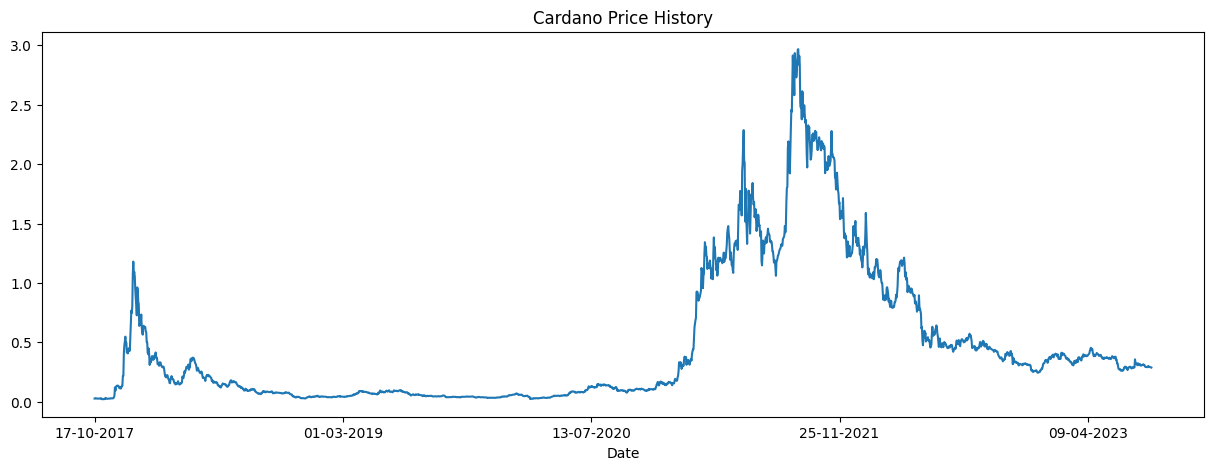

In [35]:
#plot

fig, ax = plt.subplots(figsize=(15, 5))
df_hist_cardano['Price cardano'].plot(ax=ax)
ax.set_title('Cardano Price History')
plt.show()

In [36]:

df_price = pd.concat([df_hist_bitcoin, 
                      df_hist_ethereum,
                      df_hist_chainlink, 
                      df_hist_ripple,
                      df_hist_solana, 
                      df_hist_litecoin,
                      df_hist_dogecoin, 
                      df_hist_uniswap,
                      df_hist_polkadot, 
                      df_hist_cardano])

# Show result
print(df_price)


            Price bitcoin  Price ethereum  Price chainlink  Price ripple  \
Date                                                                       
27-04-2013         135.30             NaN              NaN           NaN   
28-04-2013         141.96             NaN              NaN           NaN   
29-04-2013         135.30             NaN              NaN           NaN   
30-04-2013         117.00             NaN              NaN           NaN   
01-05-2013         103.43             NaN              NaN           NaN   
...                   ...             ...              ...           ...   
11-08-2023            NaN             NaN              NaN           NaN   
12-08-2023            NaN             NaN              NaN           NaN   
13-08-2023            NaN             NaN              NaN           NaN   
14-08-2023            NaN             NaN              NaN           NaN   
15-08-2023            NaN             NaN              NaN           NaN   

           

In [ ]:
df_price['Date'] = pd.to_datetime(df_price['Date'], format='%d-%m-%Y')


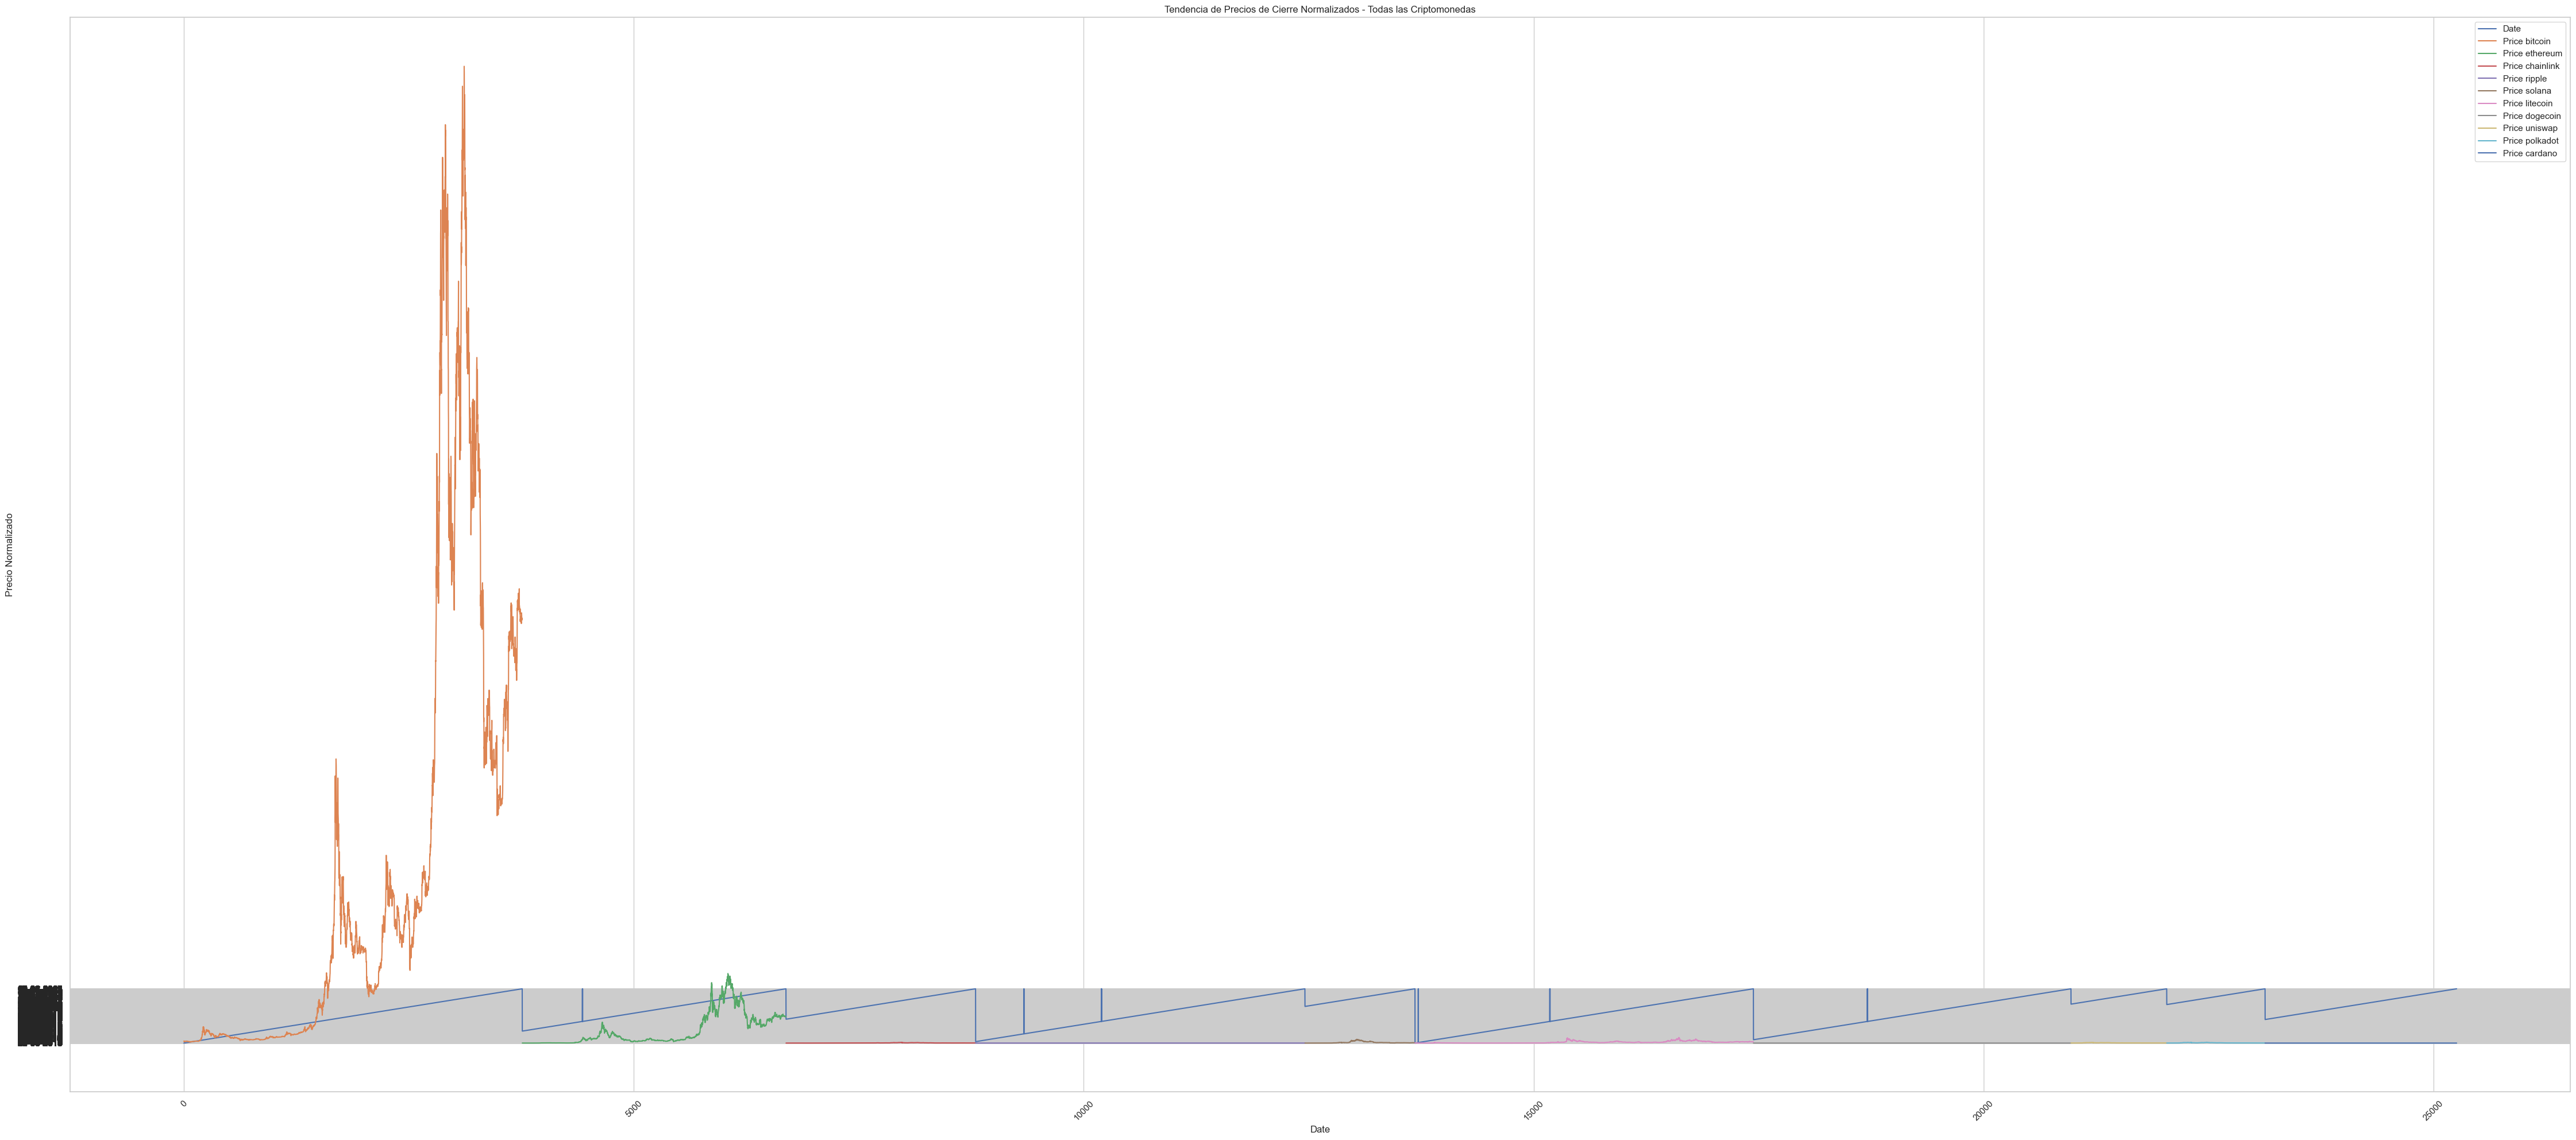

In [41]:
# Establecer el estilo de las visualizaciones de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de tendencia combinado con todas las criptomonedas con precios normalizados
plt.figure(figsize=(45, 20)) 
for symbol in df_price.columns:
    plt.plot(df_price.index, df_price[symbol], label=symbol)

plt.title('Tendencia de Precios de Cierre Normalizados - Todas las Criptomonedas')
plt.xlabel('Date')
plt.ylabel('Precio Normalizado')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [38]:
df_price = df_price.reset_index()

In [39]:
# Guardar el DataFrame en un archivo CSV
df_price.to_csv('Precios monedas.csv', index=False)

In [40]:
# Guardar el DataFrame en un archivo CSV
dfmarket_coins.to_csv('Precios historicos.csv', index=False)
